## Compare ICESat-2 ATL06 Sliderule to CDEC Data in Tuolumne

### Tried to access CDEC data programatically using ulmo. Haven't gotten it to work yet

Outdated: Made the input.wkt using:  
Outdated: gdalsrsinfo -o wkt methow_basin_2018_dtm_10.tif > input_methow.wkt

In [ ]:
#Install directly from github repo main branch
#%pip install git+https://github.com/ulmo-dev/ulmo.git

In [9]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
from astropy.time import Time
from datetime import datetime
#from imview.lib import pltlib

In [10]:
import matplotlib.dates as mdates

In [11]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [12]:
import rasterio as rio
from rasterio import features

In [13]:
import rioxarray

In [14]:
from rasterio.plot import show

In [15]:
from rasterio.plot import show

In [16]:
plt.rcParams['figure.facecolor']='w'
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'

In [17]:
%matplotlib inline

In [18]:
import scipy.stats

In [19]:
def nmad(df):
    return scipy.stats.median_abs_deviation(df, nan_policy='omit', scale='normal')

def p16(df):
    return np.nanpercentile(df, 16)

def p84(df):
    return np.nanpercentile(df, 84)

def spread(df):
    return p84(df) - p16(df)

In [20]:
#Add DOY and DOWY column
def add_dowy(df, col=None):
    print("Adding Day of Water Year (DOWY)")
    if col is None:
        df['doy'] = df.index.dayofyear
        df['decyear'] = Time(df.index).decimalyear
    else:
        df['doy'] = pd.to_datetime(df[col]).dt.dayofyear
        df['decyear'] = Time(pd.to_datetime(df[col])).decimalyear
    
    #df['dowy'] = (df['doy'].index - pd.DateOffset(months=9)).dayofyear
    # Sept 30 is doy 273
    df['dowy'] = df['doy'] - 273
    df.loc[df['dowy'] <= 0, 'dowy'] += 365

In [21]:
kw = {'width':500, 'height':400, 'hover':False, 'data_aspect':1, 'alpha':1.0}
kw['colorbar'] = True
kw['cmap'] = 'inferno'
#kw['s'] = 1
#kw['aggregator'] = 'mean'
#kw['rasterize'] = False
#Using datashade drops colorbar
kw['datashade'] = True
#kw['dynamic'] = True
#kw['backend'] = 'matplotlib'

In [22]:
%matplotlib inline

In [23]:
# ! [ -d sliderule-python ] || git clone https://github.com/ICESat2-SlideRule/sliderule-python.git 
# ! cd sliderule-python; python setup.py develop
# ! cd sliderule-python; python setup.py install

In [4]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/Tuolumne_IS2/Notebooks


## Load in Lidar Snow-Off DEM
Sourced from WaDNR, the Methow 2018 lidar project (leaf on, snow off)
https://lidarportal.dnr.wa.gov/

In [5]:
#tif_path = '../data/ASO/snow_off/ASO_20191010/ASO_3M_PCDTM_USCATE_20191010_20191010.tif'
tif_path_orig = '../data/ASO/snow_off/ASO_snowoff_linux/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL.tif'

In [6]:
#tm_tif = rxr.open_rasterio(tif_path)
tm_aso = rxr.open_rasterio(tif_path_orig)

In [7]:
tm_aso = tm_aso.squeeze()
tm_aso_nodata = tm_aso.where(tm_aso != tm_aso.rio.nodata)
tm_aso_nodata.rio.write_nodata(0, encoded=True, inplace=True)

<xarray.DataArray (y: 16780, x: 17699)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 2.542e+05 2.543e+05 ... 3.073e+05 3.073e+05
  * y            (y) float64 4.23e+06 4.23e+06 4.23e+06 ... 4.179e+06 4.179e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [5]:
# Going to avoid coarsening for now based on findings by Simon and Cesar.

scale_factor = 1/12
new_width = int(tm_tif_orig.rio.width * scale_factor)
new_height = int(tm_tif_orig.rio.height * scale_factor)

tm_tif_orig_12m = tm_tif_orig.rio.reproject(dst_crs='EPSG:32611',
    shape=(new_height, new_width),
    resampling=Resampling.bilinear,
)

In [6]:
# tm_tif_orig_12m=tm_tif_orig_12m.squeeze()

# tm_tif_orig_12m_nodata = tm_tif_orig_12m.where(tm_tif_orig_12m != tm_tif_orig_12m.rio.nodata)

# tm_tif_orig_12m_nodata.rio.write_nodata(0, encoded=True, inplace=True)

/Users/Hannah/opt/miniconda3/envs/datum_reproj/lib/python3.8/site-packages/rioxarray/raster_writer.py:108: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


<xarray.DataArray (y: 1398, x: 1474)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * x            (x) float64 2.543e+05 2.543e+05 ... 3.073e+05 3.073e+05
  * y            (y) float64 4.23e+06 4.23e+06 4.23e+06 ... 4.179e+06 4.179e+06
    band         int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

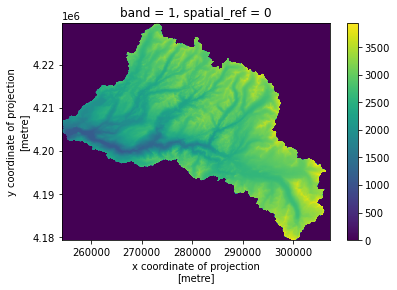

In [8]:
tm_tif_orig_12m_nodata.plot()

#### Find the bounds of the lidar dataset for ICESat-2 data request:

In [8]:
x0 = tm_aso_nodata.x
y0 = tm_aso_nodata.y

In [9]:
stc = rio.open(tif_path_orig)

In [10]:
stc.bounds

BoundingBox(left=254247.0, bottom=4179327.0, right=307344.0, top=4229667.0)

In [11]:
stc.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 17699, 'height': 16780, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(3.0, 0.0, 254247.0,
       0.0, -3.0, 4229667.0), 'tiled': False, 'interleave': 'band'}

In [11]:
x1, y1 = stc.bounds[0], stc.bounds[1]
x2, y2 = stc.bounds[2], stc.bounds[3]

# Create a transformer function to transform bound points into WGS84, for the ICESat-2 data request
transformer = Transformer.from_crs("epsg:32611", "epsg:4326")

In [12]:
x1_l, y1_l = transformer.transform(x1, y1)

In [13]:
x2_l, y2_l = transformer.transform(x2, y2)

In [14]:
# Set the approximate latitude and longitude limits of the lidar tile

lonlims = [y1_l,y2_l]
latlims = [x1_l,x2_l]

## Find the center of the study area, and create a buffer around this point 
The buffer will be used to subset to the representative snotel data (pull data only from the snotel stations that are geographically close to the Methow study region)

In [15]:
x_center = (x1 + x2) / 2
y_center = (y1 + y2) / 2

center = Point((x_center,y_center))
print(center)

POINT (280795.5 4204497)


In [16]:
df_center= pd.DataFrame({'Location':['center']})
gdf_center = gpd.GeoDataFrame(df_center, geometry=[center])
gdf_center['geometry'] = gdf_center.geometry.buffer(50000)
gdf_center

,Location,geometry
0,center,"POLYGON ((330795.500 4204497.000, 330554.736 4..."


In [17]:
df_center = pd.DataFrame({'Location':['center'], 'longitude':[x_center], 'latitude':[y_center]})
gdf_center_point = gpd.GeoDataFrame(df_center, crs='epsg:32611', geometry=gpd.points_from_xy(df_center.longitude, df_center.latitude))

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

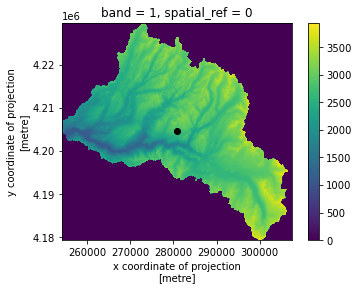

In [21]:
fig, ax = plt.subplots()

tm_tif_orig_12m_nodata.plot(ax=ax)
gdf_center.plot(ax=ax, facecolor='none', edgecolor='red')
gdf_center_point.plot(ax=ax, color = 'black')

In [18]:
# Create a transform that will go from the native ICESat-2 and Snotel CS (4326) to the common projection we will use (32611, ie UTM Zone 11 N)

target_crs = "EPSG:32611"
from pyproj import Transformer,CRS
to_target_crs = Transformer.from_crs(4326,target_crs)

## Pull in Snotel Data
Within a certain buffer of the Methow

In [22]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/Tuolumne_IS2/Notebooks


In [28]:
tum = pd.read_csv('../data/TUM_18.csv')

In [20]:
tum['OBS DATE'][126] = 20190204.0
tum['OBS DATE'][134] = 20190212.0
tum['OBS DATE'][394] = 20191030.0

<ipython-input-20-dc7a67a924ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tum['OBS DATE'][126] = 20190204.0
<ipython-input-20-dc7a67a924ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tum['OBS DATE'][134] = 20190212.0
<ipython-input-20-dc7a67a924ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tum['OBS DATE'][394] = 20191030.0


In [21]:
tum['Date'] = tum['OBS DATE'].map(lambda x: int(x))

In [22]:
tum['Date']

0       20181001
1       20181002
2       20181003
3       20181004
4       20181005
          ...   
1242    20220224
1243    20220225
1244    20220226
1245    20220227
1246    20220228
Name: Date, Length: 1247, dtype: int64

In [84]:
print(tum[tum['Date'].isnull()])

Empty DataFrame
Columns: [STATION_ID, DURATION, SENSOR_NUMBER, SENS_TYPE, DATE TIME, OBS DATE, VALUE, DATA_FLAG, UNITS, Date]
Index: []


In [24]:
tum_na = tum.dropna(subset=['Date'])

In [26]:
tum_na.head()

,STATION_ID,DURATION,SENSOR_NUMBER,SENS_TYPE,DATE TIME,OBS DATE,VALUE,DATA_FLAG,UNITS,Date
0,TUM,D,18,SNOW DP,NaN,20181001.0,2.0,NaN,INCHES,20181001
1,TUM,D,18,SNOW DP,NaN,20181002.0,0.0,NaN,INCHES,20181002
2,TUM,D,18,SNOW DP,NaN,20181003.0,1.0,NaN,INCHES,20181003
3,TUM,D,18,SNOW DP,NaN,20181004.0,1.0,NaN,INCHES,20181004
4,TUM,D,18,SNOW DP,NaN,20181005.0,1.0,NaN,INCHES,20181005


In [27]:
tum_na['Dates'] = pd.to_datetime(tum_na['Date'], format='%y%m%d')

ValueError: unconverted data remains: 1001

In [48]:
tum.tail()

,STATION_ID,DURATION,SENSOR_NUMBER,SENS_TYPE,DATE TIME,OBS DATE,VALUE,DATA_FLAG,UNITS
DATE TIME,,,,,,,,,
NaT,TUM,D,18,SNOW DP,NaN,20220224.0,35.0,NaN,INCHES
NaT,TUM,D,18,SNOW DP,NaN,20220225.0,36.0,NaN,INCHES
NaT,TUM,D,18,SNOW DP,NaN,20220226.0,37.0,NaN,INCHES
NaT,TUM,D,18,SNOW DP,NaN,20220227.0,36.0,NaN,INCHES
NaT,TUM,D,18,SNOW DP,NaN,20220228.0,34.0,NaN,INCHES


In [21]:
# Get info on the different data sources available in this CUAHSI database, 
# to find out how to access CDEC snow pillow data:

#ulmo.cuahsi.his_central.get_services(bbox=None, user_cache=False)

[{'title': 'National Ecological Observatory Network',
  'service_description_url': 'http://hiscentral.cuahsi.org/pub_network.aspx?n=5655',
  'email': 'mseul@cuahsi.org',
  'phone': None,
  'organization': 'National Ecological Observatory Network',
  'citation': 'National Ecological Observatory Network. 2016. Provisional data downloaded from http://data.neonscience.org on [DOWNLOAD DATE]. Battelle, Boulder, CO, USA',
  'service_id': 5655,
  'network_name': 'NEON',
  'service_status': None,
  'abstract': 'The National Ecological Observatory Network provides open data to understand changing ecosystems. NEON measures a diverse suite of biological, physical, chemical and ecological characteristics at field sites across the continent. NEON data are sent to headquarters after site construction is complete and data collection begins. The Observatory processes these measurements to derive standard, quality-assured data products that support greater understanding of complex ecological processes 

In [20]:
wsdlurl = 'https://hydroportal.cuahsi.org/CDEC/cuahsi_1_1.asmx?WSDL'
sites = ulmo.cuahsi.wof.get_sites(wsdlurl)

In [21]:
sites_df = pd.DataFrame.from_dict(sites, orient='index').dropna()
sites_df['geometry'] = [Point(float(loc['longitude']), float(loc['latitude'])) for loc in sites_df['location']]

In [43]:
sites_df.head()

,code,name,network,location,elevation_m,site_property,geometry
CDEC:07K,07K,19N2E07K2-4M HARRIS RD NR RICHVALE,CDEC,"{'latitude': '39.511768341064453', 'longitude'...",93,"{'county': 'BUTTE', 'state': 'Unknown', 'site_...",POINT (-121.7879791259766 39.51176834106445)
CDEC:130,130,SAN JOAQUIN R - MONITORING WELL #130,CDEC,"{'latitude': '37.023311614990234', 'longitude'...",130,"{'county': 'FRESNO', 'state': 'Unknown', 'site...",POINT (-120.5390243530273 37.02331161499023)
CDEC:13L,13L,21N1E13L2-4M CHICO UNIV FARM,CDEC,"{'latitude': '39.673446655273438', 'longitude'...",151,"{'county': 'BUTTE', 'state': 'Unknown', 'site_...",POINT (-121.8144226074219 39.67344665527344)
CDEC:142,142,SAN JOAQUIN R - MONITORING WELL #142,CDEC,"{'latitude': '37.186100006103516', 'longitude'...",100,"{'county': 'FRESNO', 'state': 'Unknown', 'site...",POINT (-120.6828994750977 37.18610000610352)
CDEC:1ST,1ST,KERN RIVER AT FIRST POINT,CDEC,"{'latitude': '35.4466667175293', 'longitude': ...",470,"{'county': 'KERN', 'state': 'Unknown', 'site_c...",POINT (-118.9225006103516 35.4466667175293)


In [22]:
sites_df = sites_df.drop(columns='location')
sites_df = sites_df.astype({"elevation_m":float})

In [23]:
sites_gdf = gpd.GeoDataFrame(sites_df, crs='EPSG:4326', geometry=sites_df['geometry'])

In [24]:
# Transform the snotel site locations to 32611

points_cdec = []
points = list(zip(sites_gdf.geometry.y, sites_gdf.geometry.x, sites_gdf.elevation_m))
for pt in to_target_crs.itransform(points):
    points_cdec.append(pt)
x_cdec = [x_tuple[0] for x_tuple in points_cdec]
y_cdec = [y_tuple[1] for y_tuple in points_cdec]
z_cdec = [z_tuple[2] for z_tuple in points_cdec]
sites_gdf_transformed = gpd.GeoDataFrame(sites_gdf, geometry=gpd.points_from_xy(x_cdec, y_cdec))     # crs='EPSG:32610' - took this out because of deprecation warning
sites_gdf_transformed['elevation_transformed'] = z_cdec

Create a buffer within 20-40 km to pull in snotel data:
* Create a point in the middle of the study site
* Buffer that point at ~30km
* Intersect the two geodataframes to create a new one of just snotel sites within that buffer?

<AxesSubplot:>

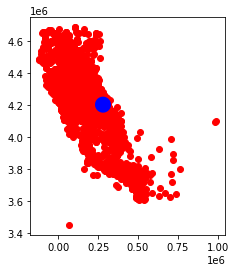

In [29]:
fig, ax = plt.subplots()

sites_gdf_transformed.plot(ax=ax, c='red')
gdf_center.plot(ax=ax, color='blue')

## Clip Snotel Data to a 5km buffer around the center of the Methow study area

In [25]:
cdec_50km = gpd.clip(sites_gdf_transformed, gdf_center)

In [31]:
cdec_50km.head()

,code,name,network,elevation_m,site_property,geometry,elevation_transformed
CDEC:5SI,5SI,SAN JOAQUIN 5-STATION PRECIP INDEX,CDEC,0.0,"{'county': 'none specified', 'state': 'Unknown...",POINT (272401.655 4180109.649),0.0
CDEC:AGP,AGP,AGNEW PASS,CDEC,9450.0,"{'county': 'MADERA', 'state': 'Unknown', 'site...",POINT (311254.698 4177644.022),9450.0
CDEC:BCY,BCY,BUCKEYE ROUGHS,CDEC,7900.0,"{'county': 'MONO', 'state': 'Unknown', 'site_c...",POINT (286131.901 4229493.004),7900.0
CDEC:BDG,BDG,BRIDGEPORT R S,CDEC,6470.0,"{'county': 'MONO', 'state': 'Unknown', 'site_c...",POINT (304604.177 4235911.567),6470.0
CDEC:BDP,BDP,BRIDGEPORT RESERVOIR,CDEC,6466.0,"{'county': 'MONO', 'state': 'Unknown', 'site_c...",POINT (306728.874 4244188.664),6466.0


In [26]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
#states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'

states_gdf = gpd.read_file(states_url)
states_gdf = states_gdf.to_crs('epsg:32611')

california = states_gdf.loc[states_gdf.NAME == 'California']

In [33]:
gdf_center.total_bounds

array([ 230795.5, 4154497. ,  330795.5, 4254497. ])

In [27]:
xlim = ([gdf_center.total_bounds[0],  gdf_center.total_bounds[2]])
ylim = ([gdf_center.total_bounds[1],  gdf_center.total_bounds[3]])

In [28]:
xlim_ca = ([california.total_bounds[0],  california.total_bounds[2]])
ylim_ca = ([california.total_bounds[1],  california.total_bounds[3]])

In [36]:
import contextily as ctx

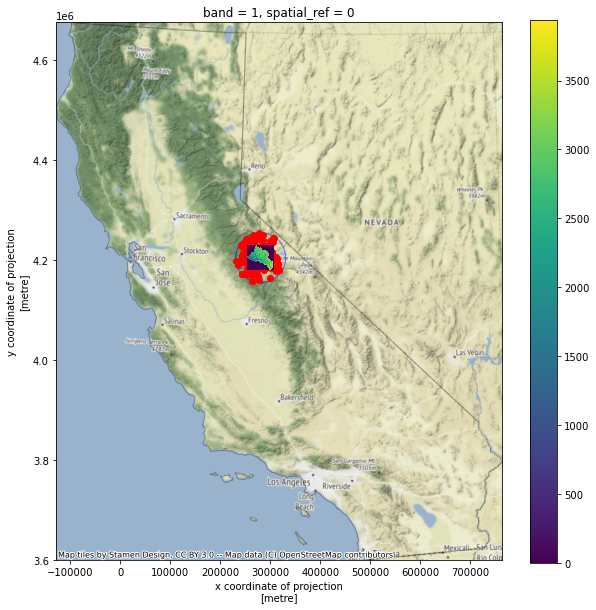

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_center.plot(ax=ax, facecolor='none', edgecolor='blue', alpha=0.5)
cdec_50km.plot(ax=ax, c='red')
california.plot(ax=ax, facecolor='none', edgecolor='k', alpha=0.3)
tm_tif_orig_12m_nodata.plot(ax=ax)
ax.set_xlim(xlim_ca)
ax.set_ylim(ylim_ca)
ctx.add_basemap(ax=ax, crs='epsg:32611', source=ctx.providers.Stamen.Terrain);

## Fetch Snotel Data for the duration of the ICESat-2 Mission

In [38]:
site_codes = []
for i in range(len(cdec_50km)):
    site_codes.append(cdec_50km.index[i])
    
#Use corresponding colors in line and location scatterplots
color_list = ['C%i' % i for i in range(len(site_codes))]

site_codes

['CDEC:5SI',
 'CDEC:AGP',
 'CDEC:BCY',
 'CDEC:BDG',
 'CDEC:BDP',
 'CDEC:BEM',
 'CDEC:BHV',
 'CDEC:BKY',
 'CDEC:BNP',
 'CDEC:BPT',
 'CDEC:CBD',
 'CDEC:CBV',
 'CDEC:CEI',
 'CDEC:CFL',
 'CDEC:CFM',
 'CDEC:CHV',
 'CDEC:CMW',
 'CDEC:CQP',
 'CDEC:CRA',
 'CDEC:CTM',
 'CDEC:CVD',
 'CDEC:CVM',
 'CDEC:CWM',
 'CDEC:CYL',
 'CDEC:DAN',
 'CDEC:DDM',
 'CDEC:DDR',
 'CDEC:DGH',
 'CDEC:ECK',
 'CDEC:EDT',
 'CDEC:EGM',
 'CDEC:EIN',
 'CDEC:ELL',
 'CDEC:ENR',
 'CDEC:EPW',
 'CDEC:ERY',
 'CDEC:EWR',
 'CDEC:FHH',
 'CDEC:FLE',
 'CDEC:FLV',
 'CDEC:FS1',
 'CDEC:FS2',
 'CDEC:FS3',
 'CDEC:GCM',
 'CDEC:GEM',
 'CDEC:GFL',
 'CDEC:GIN',
 'CDEC:GLK',
 'CDEC:GML',
 'CDEC:GNL',
 'CDEC:GNT',
 'CDEC:GYP',
 'CDEC:HCL',
 'CDEC:HEM',
 'CDEC:HHY',
 'CDEC:HIB',
 'CDEC:HRD',
 'CDEC:HRS',
 'CDEC:HTH',
 'CDEC:JFR',
 'CDEC:JHN',
 'CDEC:JLK',
 'CDEC:JLS',
 'CDEC:JMS',
 'CDEC:JMW',
 'CDEC:KIB',
 'CDEC:KRC',
 'CDEC:LKB',
 'CDEC:LVG',
 'CDEC:LVM',
 'CDEC:LVT',
 'CDEC:LYL',
 'CDEC:MBS',
 'CDEC:MDP',
 'CDEC:MLK',
 'CDEC:MTO',
 'CDEC:MTR',

In [139]:
# Get info about the different variables available, to figure out what the snow depth variable is named:

#ulmo.cuahsi.wof.get_variable_info(wsdlurl, variable_code=None, suds_cache=None,timeout=None, user_cache=False)

{'CDEC:RIV_STG': {'value_type': 'Field Observation',
  'data_type': 'Unknown',
  'general_category': 'Unknown',
  'sample_medium': 'Unknown',
  'no_data_value': '-9999',
  'speciation': 'Not Applicable',
  'code': 'RIV_STG',
  'id': '1',
  'name': 'Water Level',
  'vocabulary': 'CDEC',
  'time': {'is_regular': True,
   'interval': '1',
   'units': {'abbreviation': 'd',
    'code': '104',
    'name': 'day',
    'type': 'Time'}},
  'units': {'abbreviation': 'ft',
   'code': '48',
   'name': 'international foot',
   'type': 'Length'}},
 'CDEC:RAIN': {'value_type': 'Field Observation',
  'data_type': 'Cumulative',
  'general_category': 'Unknown',
  'sample_medium': 'Unknown',
  'no_data_value': '-9999',
  'speciation': 'Not Applicable',
  'code': 'RAIN',
  'id': '2',
  'name': 'Precipitation',
  'vocabulary': 'CDEC',
  'time': {'is_regular': True,
   'interval': '1',
   'units': {'abbreviation': 'd',
    'code': '104',
    'name': 'day',
    'type': 'Time'}},
  'units': {'abbreviation': 'i

 'CDEC:SNOW_DP': {'value_type': 'Field Observation',
  'data_type': 'Unknown',
  'general_category': 'Unknown',
  'sample_medium': 'Snow',
  'no_data_value': '-9999',
  'speciation': 'Not Applicable',
  'code': 'SNOW_DP',
  'id': '18',
  'name': 'Snow depth',
  'vocabulary': 'CDEC',
  'time': {'is_regular': True,
   'interval': '1',
   'units': {'abbreviation': 'd',
    'code': '104',
    'name': 'day',
    'type': 'Time'}},
  'units': {'abbreviation': 'in',
   'code': '49',
   'name': 'international inch',
   'type': 'Length'}},

In [97]:
# Function from David Shean, as supplied during GDA course through UW offered in Winter 2021

#Get current datetime
today = datetime.today().strftime('%Y-%m-%d')

def fetch(sitecode, variablecode='CDEC:SNOW_DP', start_date='2018-10-01', end_date=today):
    #print(sitecode, variablecode, start_date, end_date)
    values_df = None
    try:
        #Request data from the server
        site_values = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)
        #Convert to a Pandas DataFrame   
        values_df = pd.DataFrame.from_dict(site_values['values'])
        #Parse the datetime values to Pandas Timestamp objects
        values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
        #Set the DataFrame index to the Timestamps
        values_df = values_df.set_index('datetime')
        #Convert values to float and replace -9999 nodata values with NaN
        values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
        #Remove any records flagged with lower quality
        values_df = values_df[values_df['quality_control_level_code'] == '1']
    except:
        print("Unable to fetch %s" % variablecode)

    return values_df

### Use this function to get the record for all snotel sites within a 60km radius of the Methow for the duration of the ICESat-2 Mission.
Much of this code is from David Shean's GDA 2021 course. The code is from 08_Vector_TimeSeries_SNOTEL_exercises.ipynb which can be accessed here: https://github.com/UW-GDA/gda_course_2021/tree/main/modules/08_Vector_TimeSeries_SNOTEL

In [66]:
start_date = datetime(2018,10,1)
end_date = datetime.today()

#Daily snow depth
variablecode = 'CDEC:SNOW_DP'

In [45]:
dan = fetch(sitecode='CDEC:DAN',variablecode='SNOW_DP', start_date=start_date, end_date=today)

In [46]:
dan

,value,censor_code,time_offset,date_time_utc,method_id,source_id,method_code,source_code,quality_control_level_code
datetime,,,,,,,,,
2018-10-01 05:00:00+00:00,NaN,nc,-8,2018-10-01T12:00:00Z,0,1,0,1,1


In [53]:
tum = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)

In [81]:
sitecode='CDEC:SLI'
sli = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)

In [94]:
sli['values']

[{'value': '-9999',
  'censor_code': 'nc',
  'time_offset': '-8',
  'date_time_utc': '2018-10-01T12:00:00Z',
  'method_id': '0',
  'source_id': '1',
  'method_code': '0',
  'source_code': '1',
  'quality_control_level_code': '1',
  'datetime': '2018-10-01T05:00:00'},
 {'value': '0',
  'censor_code': 'nc',
  'time_offset': '-8',
  'date_time_utc': '2018-10-02T12:00:00Z',
  'method_id': '0',
  'source_id': '1',
  'method_code': '0',
  'source_code': '1',
  'quality_control_level_code': '1',
  'datetime': '2018-10-02T05:00:00'},
 {'value': '0',
  'censor_code': 'nc',
  'time_offset': '-8',
  'date_time_utc': '2018-10-03T12:00:00Z',
  'method_id': '0',
  'source_id': '1',
  'method_code': '0',
  'source_code': '1',
  'quality_control_level_code': '1',
  'datetime': '2018-10-03T05:00:00'},
 {'value': '0',
  'censor_code': 'nc',
  'time_offset': '-8',
  'date_time_utc': '2018-10-04T12:00:00Z',
  'method_id': '0',
  'source_id': '1',
  'method_code': '0',
  'source_code': '1',
  'quality_cont

In [95]:
sitecode='CDEC:SLI'
sli = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)
values_df = pd.DataFrame.from_dict(sli['values'])
#Parse the datetime values to Pandas Timestamp objects
values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
#Set the DataFrame index to the Timestamps
values_df = values_df.set_index('datetime')
#Convert values to float and replace -9999 nodata values with NaN
values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
#Remove any records flagged with lower quality
values_df = values_df[values_df['quality_control_level_code'] == '1']

In [98]:
slide = fetch(sitecode='CDEC:SLI', variablecode='SNOW_DP', start_date=start_date, end_date=today)

In [101]:
slide.shape

(53, 9)

In [96]:
tum.keys()

dict_keys(['site', 'variable', 'values', 'censor_codes', 'methods', 'quality_control_levels', 'sources'])

In [31]:
# SNOTEL sites with a 60km radius of the Methow
pkl_fn = 'cdec_snwd_d.pkl'
gdf = cdec_50km

In [40]:
gdf.index

Index(['CDEC:5SI', 'CDEC:AGP', 'CDEC:BCY', 'CDEC:BDG', 'CDEC:BDP', 'CDEC:BEM',
       'CDEC:BHV', 'CDEC:BKY', 'CDEC:BNP', 'CDEC:BPT',
       ...
       'CDEC:WHW', 'CDEC:WLF', 'CDEC:WLW', 'CDEC:WWN', 'CDEC:WWR', 'CDEC:X04',
       'CDEC:X05', 'CDEC:YSM', 'CDEC:YSV', 'CDEC:YYV'],
      dtype='object', length=131)

In [60]:
cdec_stations = ['CDEC:TES', 'CDEC:DAN', 'CDEC:GYP', 'CDEC:SLI', 'CDEC:TUM', 'CDEC:HRS', 'CDEC:WHW', 'CDEC:PDS', 'CDEC:KIB', 'CDEC:CMW', 'CDEC:CVM']

In [68]:
# SNOTEL sites with a 60km radius of the Methow
pkl_fn = 'cdec_snwd_d.pkl'
gdf = cdec_50km

if os.path.exists(pkl_fn):
    snwd_df = pd.read_pickle(pkl_fn)
else:
    #Define an empty dictionary to store returns for each site
    value_dict = {}
    for i, sitecode in enumerate(cdec_stations):
        print('%i of %i sites' % (i+1, len(cdec_stations)) )
        #out = fetch(sitecode, variablecode, start_date, end_date)
        out = fetch(sitecode, variablecode)
        if out is not None:
            value_dict[sitecode] = out['value']
    #Convert the dictionary to a DataFrame, automatically handles different datetime ranges (nice!)
    snwd_df = pd.DataFrame.from_dict(value_dict)
    #Write out
    print(f"Writing out: {pkl_fn}")
    snwd_df.to_pickle(pkl_fn)

1 of 11 sites
Unable to fetch CDEC:SNOW_DP
2 of 11 sites
Unable to fetch CDEC:SNOW_DP
3 of 11 sites
Unable to fetch CDEC:SNOW_DP
4 of 11 sites
Unable to fetch CDEC:SNOW_DP
5 of 11 sites
Unable to fetch CDEC:SNOW_DP
6 of 11 sites
Unable to fetch CDEC:SNOW_DP
7 of 11 sites
Unable to fetch CDEC:SNOW_DP
8 of 11 sites
Unable to fetch CDEC:SNOW_DP
9 of 11 sites
Unable to fetch CDEC:SNOW_DP
10 of 11 sites
Unable to fetch CDEC:SNOW_DP
11 of 11 sites
Unable to fetch CDEC:SNOW_DP
Writing out: cdec_snwd_d.pkl


In [59]:
snwd_df.shape

(0, 0)

In [136]:
snwd_df.tail()

""


In [34]:
snwd_df_cm = snwd_df*2.54

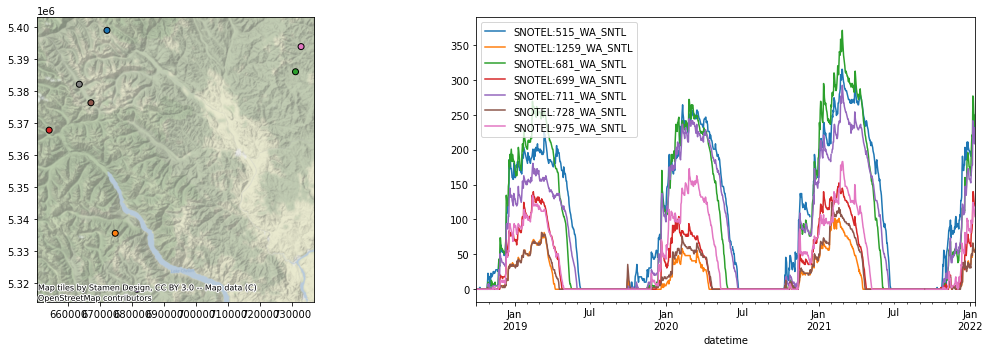

In [36]:
color_list = ['C%i' % i for i in range(len(site_codes))]

f, axa = plt.subplots(1,2,figsize=(15,5))

snotel_60km.plot(facecolor=color_list, edgecolor='k', ax=axa[0])
ctx.add_basemap(ax=axa[0], crs='epsg:32610', source=ctx.providers.Stamen.Terrain, alpha=0.7)
snwd_df_cm.dropna(thresh=2).plot(ax=axa[1])
plt.tight_layout()

In [255]:
atl08_methow.head()

,gt,dh_fit_dy,segment_id,cycle,h_sigma,w_surface_window_final,dh_fit_dx,pflags,spot,h_mean,rms_misfit,n_fit_photons,distance,delta_time,rgt,geometry,z,date
time,,,,,,,,,,,,,,,,,,
2018-11-09 22:09:43.035973960,10,0.0,268297,1,0.069069,3.0,0.083485,0,2,685.438498,0.251951,15,5.379978e+06,2.703658e+07,646,POINT (722466.536 5356331.105),685.438498,2018-11-09
2018-11-09 22:09:43.037368360,10,0.0,268298,1,0.112889,3.0,0.103485,0,2,686.401538,0.367545,13,5.379988e+06,2.703658e+07,646,POINT (722465.127 5356341.008),686.401538,2018-11-09
2018-11-09 22:09:43.042977232,10,0.0,268300,1,0.086586,3.0,0.050065,0,2,689.953035,0.339347,16,5.380028e+06,2.703658e+07,646,POINT (722459.543 5356380.699),689.953035,2018-11-09
2018-11-09 22:09:43.044386564,10,0.0,268300,1,0.082309,3.0,0.069648,0,2,690.570976,0.270457,15,5.380038e+06,2.703658e+07,646,POINT (722458.160 5356390.643),690.570976,2018-11-09
2018-11-09 22:09:43.045794856,10,0.0,268301,1,0.051346,3.0,0.085295,0,2,691.352018,0.175145,12,5.380048e+06,2.703658e+07,646,POINT (722456.787 5356400.550),691.352018,2018-11-09


## Request ICESat-2 Data for ATL08

In [18]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/Tuolumne_IS2/Notebooks


In [24]:
atl06sr_fn = './../data/tuolumne_all_04062022.geojson'
atl06sr_gdf_ll = gpd.read_file(atl06sr_fn)

AttributeError: 'ValueError' object has no attribute 'startswith'

In [15]:
atl06sr_fn = './../data/tuolumne_all_04062022.geojson'
atl06sr_gdf_ll = gpd.read_file(atl06sr_fn)
atl06sr_gdf_ll.time = pd.DatetimeIndex(atl06sr_gdf_ll.time)
atl06sr_gdf_ll = atl06sr_gdf_ll.set_index(['time'])
atl06sr_gdf_ll.sort_index(inplace=True)
atl06sr_gdf_ll['acqdate'] = atl06sr_gdf_ll.index.date
atl06sr_col = 'h_mean'
atl06sr_title = 'ICESat-2 ATL06-SR 40m (ground)'
atl06sr_gdf_ll.shape

AttributeError: 'ValueError' object has no attribute 'startswith'

In [ ]:
polygon_gdf = gpd.read_file('./../data/UpperTuolRiverBasinOutline.geojson', crs='epsg:4326')
polygon_gdf.head()

In [35]:
# Define a function that will fetch sliderule data according to your specifications
# and output a geodataframe with transformed height values in column 'z'

def fetch_atl08sliderule(latlims = latlims, lonlims = lonlims, len=40, res=20, \
                         cnf=icesat2.CNF_SURFACE_MEDIUM, atl08_class="atl08_ground"):
    #from sliderule import icesat2

    # initialize
    icesat2.init("icesat2sliderule.org", verbose=False)

    # region of interest polygon
    region = [ {"lon":lon_i, "lat":lat_i} for lon_i, lat_i in 
              zip(np.array(lonlims)[[0, -1, -1, 0, 0]],  np.array(latlims)[[0, 0, -1, -1, 0]])]

    # request parameters
    params = {
        "poly": region,  # request the polygon defined by our lat-lon bounds
        "srt": icesat2.SRT_LAND, # request classification based on the land algorithm
        "cnf": cnf, # use all photons of low confidence or better
        "len": len,  # fit data in overlapping len-meter segments
        "res": res,  # report one height every res m
        "ats":5., #report a segment only if it contains at least 2 photons separated by 5 m
        "maxi": 6,  # allow up to six iterations in fitting each segment to the data
        "spot": 'beam (like gt1r --> spot 1,2,3,4..)',
        "timeout": 'wait forever'
    }

    # make request
    atl08_methow = icesat2.atl06p(params, "atlas-s3")

    # save the result in a dataframe
    #atl08_295 = pd.DataFrame(rsps)

    # calculate the polar-stereographic coordinates:
    #df['x'], df['y']=to_image_crs.transform(df['lat'], df['lon'])
    
    # mask for selcting cycle 295 - for other sites need to find a different track to select
    #mask = df.rgt == 295
    #atl08_295 = df  #[mask]
    # mask for rgt 8
    #mask = atl08_295['cycle'] == 8
    #atl08_295 = atl08_295[mask]
    points_atl08_methow = []
    points08 = list(zip(atl08_methow.geometry.y, atl08_methow.geometry.x, atl08_methow.h_mean))
    for pt in to_target_crs.itransform(points08):
        points_atl08_methow.append(pt)
    x08 = [x_tuple[0] for x_tuple in points_atl08_methow]
    y08 = [y_tuple[1] for y_tuple in points_atl08_methow]
    z08 = [z_tuple[2] for z_tuple in points_atl08_methow]
    atl08_methow_gdf = gpd.GeoDataFrame(
    atl08_methow, 
    geometry=gpd.points_from_xy(x08, y08))     # crs='EPSG:32610' - took this out because of deprecation warning
    atl08_methow_gdf['z'] = z08
    #atl06_295_gdf = atl06_295_gdf.to_crs('EPSG:32612')
    # clip to bounds
    atl08_methow_gdf_bound = atl08_methow_gdf.cx[np.min(x0):np.max(x0),np.min(y0):np.max(y0)]
    return atl08_methow_gdf_bound

In [36]:
atl08_methow = fetch_atl08sliderule()

In [314]:
atl08_methow.tail()

,gt,dh_fit_dy,segment_id,cycle,h_sigma,w_surface_window_final,dh_fit_dx,pflags,spot,h_mean,rms_misfit,n_fit_photons,distance,delta_time,rgt,geometry,z
time,,,,,,,,,,,,,,,,,
2021-05-06 02:47:35.826300240,60,0.0,268467,11,0.075113,3.0,0.027719,0,5,554.183137,0.268618,13,5.383374e+06,1.055045e+08,646,POINT (719308.236 5359329.688),554.183137
2021-05-06 02:47:35.827722016,60,0.0,268467,11,0.034668,3.0,0.010287,0,5,554.355603,0.112015,12,5.383384e+06,1.055045e+08,646,POINT (719306.869 5359339.633),554.355603
2021-05-06 02:47:35.829139520,60,0.0,268468,11,0.080407,3.0,-0.042653,0,5,554.255697,0.254218,10,5.383394e+06,1.055045e+08,646,POINT (719305.503 5359349.542),554.255697
2021-05-06 02:47:36.365336608,20,0.0,268646,11,0.021546,3.0,0.008255,0,1,466.680026,0.068131,10,5.386970e+06,1.055045e+08,646,POINT (712456.234 5362028.418),466.680026
2021-05-06 02:47:38.934695984,20,0.0,269558,11,0.017664,3.0,0.009655,0,1,-56.880150,0.024335,10,5.405233e+06,1.055045e+08,646,POINT (709994.456 5380130.526),-56.880150


In [37]:
atl08_methow['date'] = atl08_methow.index.date
atl08_methow.date.unique()

array([datetime.date(2018, 11, 9), datetime.date(2019, 1, 10),
       datetime.date(2019, 4, 11), datetime.date(2019, 5, 10),
       datetime.date(2019, 7, 11), datetime.date(2019, 8, 9),
       datetime.date(2019, 11, 8), datetime.date(2020, 1, 9),
       datetime.date(2020, 4, 8), datetime.date(2020, 5, 7),
       datetime.date(2020, 7, 8), datetime.date(2020, 8, 6),
       datetime.date(2020, 10, 7), datetime.date(2021, 2, 4),
       datetime.date(2021, 3, 9), datetime.date(2021, 4, 7),
       datetime.date(2021, 5, 6)], dtype=object)

## Extract Elevations from Snow Off DEM

In [38]:
from osgeo import gdal
gdal_ds = gdal.Open(lidar_combined_fn)
band = gdal_ds.GetRasterBand(1)
dem_ma = band.ReadAsArray()
dem_gt = gdal_ds.GetGeoTransform()

In [39]:
dem_ma

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [40]:
#https://github.com/uw-cryo/skysat_stereo
def mapToPixel(mX, mY, geoTransform):
    """Convert map coordinates to pixel coordinates based on geotransform
    
    Accepts float or NumPy arrays
    GDAL model used here - upper left corner of upper left pixel for mX, mY (and in GeoTransform)
    """
    mX = np.asarray(mX)
    mY = np.asarray(mY)
    if geoTransform[2] + geoTransform[4] == 0:
        pX = ((mX - geoTransform[0]) / geoTransform[1]) - 0.5
        pY = ((mY - geoTransform[3]) / geoTransform[5]) - 0.5
    else:
        pX, pY = applyGeoTransform(mX, mY, invertGeoTransform(geoTransform))
    #return int(pX), int(pY)
    return pX, pY

def sample_ndimage(dem_ma,dem_gt,map_x,map_y,r='bilinear'):
    """
    sample values from the dem masked array for the points in map_x, map_y coordinates
    dem_ma: Masked numpy array, prefer the dem to be conitnous though
    gt: geotransform of dem/input array
    map_x: x_coordinate array
    map_y: y_coordinate array
    r: resampling algorithm for decimal px location
    out: array containing sampled values at zip(map_y,map_x)
    """
    import scipy.ndimage
    #convert map points to px points using geotransform information
    img_x,img_y = mapToPixel(map_x,map_y,dem_gt)
    #prepare input for sampling function
    yx = np.array([img_y,img_x])
    # sample the array
    sampled_pts = scipy.ndimage.map_coordinates(dem_ma, yx, order=1,mode='nearest')
    return sampled_pts

In [41]:
x = atl08_methow.geometry.x.values
y = atl08_methow.geometry.y.values
lidar_h= sample_ndimage(dem_ma,dem_gt,x,y)

In [42]:
atl08_methow['lidar_z'] = lidar_h

In [56]:
atl08_methow['lidar_z'].describe()

count    88826.000000
mean     -1239.491333
std       4374.212891
min      -9999.000000
25%        536.736649
50%        779.158661
75%       1065.799133
max       1995.009399
Name: lidar_z, dtype: float64

In [57]:
atl08_methow = atl08_methow.loc[atl08_methow['lidar_z'] > 0]

In [58]:
atl08_methow['difference'] = atl08_methow['z'] - atl08_methow['lidar_z']
#atl08_methow = atl08_methow.loc[atl08_methow['difference'] < 1000]
#atl08_methow['difference_cm'] = atl08_methow['difference'] * 100
#atl08_methow.index = atl08_methow.index.to_period('D')

/Users/Hannah/opt/miniconda3/envs/datum_reproj/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [136]:
atl08_methow['difference'].describe()

count    88722.000000
mean      2254.273647
std       4517.003634
min      -1119.011822
25%         -0.378754
50%          0.285151
75%          6.820788
max      12364.892337
Name: difference, dtype: float64

In [59]:
atl08_methow['difference'].describe()

count    71105.000000
mean         1.117819
std         11.399211
min      -1119.011822
25%         -0.480175
50%         -0.066059
75%          1.013237
max       1735.948461
Name: difference, dtype: float64

In [60]:
atl08_methow['difference_cm'] = atl08_methow['difference'] * 100

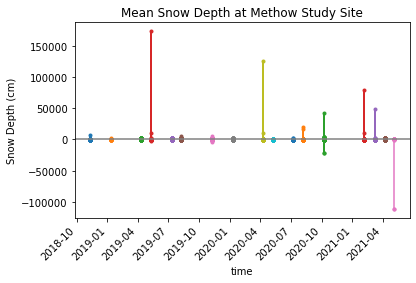

In [61]:
fig, ax = plt.subplots()

atl08_methow['difference_cm'].groupby(atl08_methow.date).plot(marker='.') # , linestyle='none'
plt.axhline(y=0, c='grey')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=45)
plt.title('Mean Snow Depth at Methow Study Site');

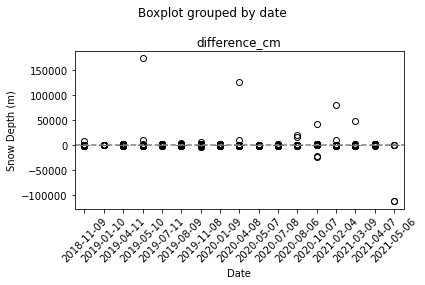

In [62]:
atl08_methow.boxplot(column=['difference_cm'], by=['date'], grid=False)
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Snow Depth (m)')
plt.xticks(rotation=45)
plt.tight_layout()

<AxesSubplot:>

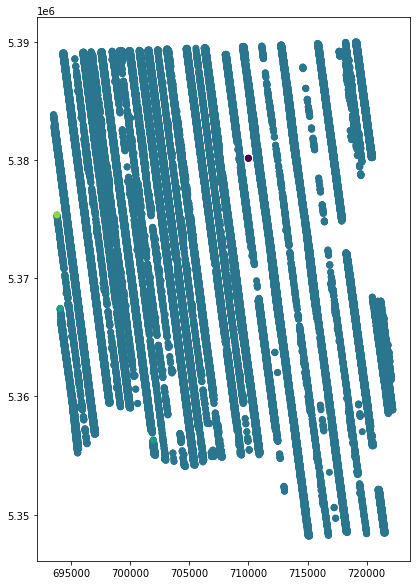

In [63]:
fig, ax = plt.subplots(figsize=(10,10))

atl08_methow.plot('difference', cmap='viridis', ax=ax)

In [64]:
atl08_methow.index = atl08_methow.index.to_period('D')
atl08_methow.index

PeriodIndex(['2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09',
             '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09',
             '2018-11-09', '2018-11-09',
             ...
             '2021-05-06', '2021-05-06', '2021-05-06', '2021-05-06',
             '2021-05-06', '2021-05-06', '2021-05-06', '2021-05-06',
             '2021-05-06', '2021-05-06'],
            dtype='period[D]', name='time', length=71105)

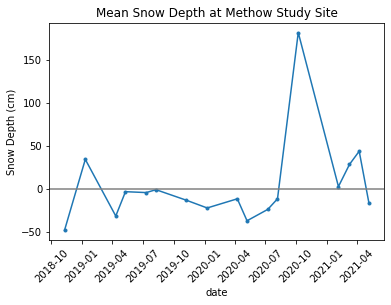

In [65]:
fig, ax = plt.subplots()

atl08_methow['difference_cm'].groupby(atl08_methow.date).median().plot(marker='.') # , linestyle='none'
plt.axhline(y=0, c='grey')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=45)
plt.title('Mean Snow Depth at Methow Study Site');

/Users/Hannah/opt/miniconda3/envs/datum_reproj/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 17844.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


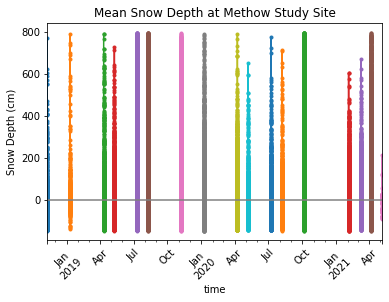

In [110]:
fig, ax = plt.subplots()

atl08_methow_95_5['difference_cm'].groupby(atl08_methow_95_5.date).plot(marker='.') # , linestyle='none'
plt.axhline(y=0, c='grey')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=45)
plt.title('Mean Snow Depth at Methow Study Site');

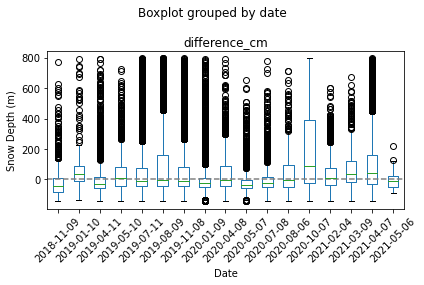

In [70]:
atl08_methow_95_5.boxplot(column=['difference_cm'], by=['date'], grid=False)
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Snow Depth (m)')
plt.xticks(rotation=45)
plt.tight_layout()

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

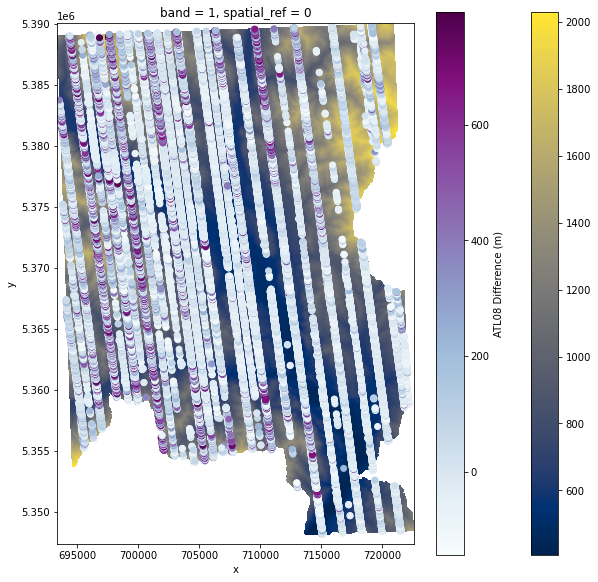

In [108]:
fig, ax = plt.subplots(figsize=(10,10))

lidar_combined_nodata.squeeze().plot(ax=ax,cmap='cividis', label='Elevation (m)')
atl08_methow_95_5.plot('difference_cm', ax=ax, legend=True, legend_kwds={'label':'ATL08 Difference (m)'}, cmap='BuPu')

In [82]:
# Try again without anything under 0....

atl08_methow_95_5_0 = atl08_methow_95_5.loc[atl08_methow_95_5['difference_cm'] > 0]

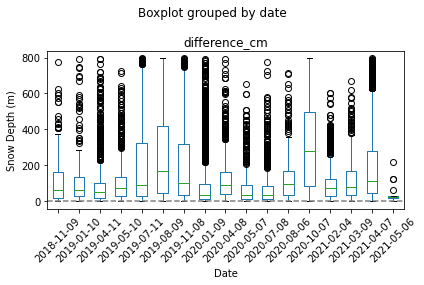

In [83]:
atl08_methow_95_5_0.boxplot(column=['difference_cm'], by=['date'], grid=False)
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Snow Depth (m)')
plt.xticks(rotation=45)
plt.tight_layout()

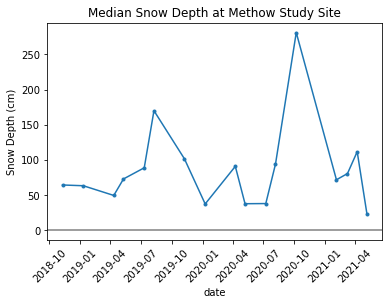

In [111]:
fig, ax = plt.subplots()

atl08_methow_95_5_0['difference_cm'].groupby(atl08_methow_95_5_0.date).median().plot(marker='.') # , linestyle='none'
plt.axhline(y=0, c='grey')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=45)
plt.title('Median Snow Depth at Methow Study Site');

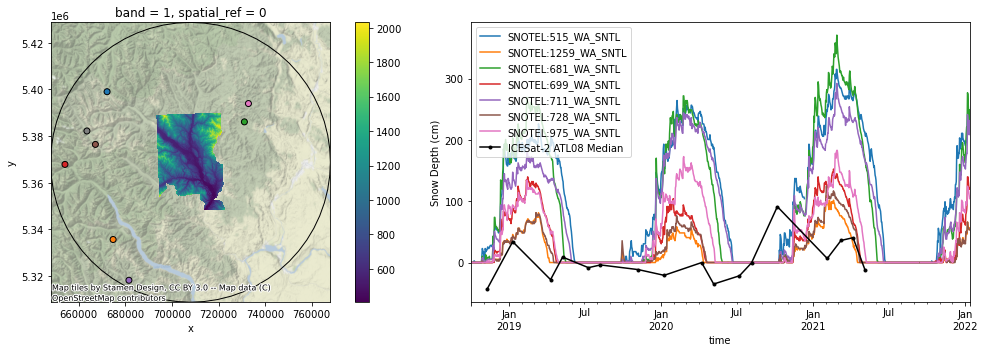

In [112]:
color_list = ['C%i' % i for i in range(len(site_codes))]

f, axa = plt.subplots(1,2,figsize=(15,5))

snotel_60km.plot(facecolor=color_list, edgecolor='k', ax=axa[0])
gdf_center_point.plot(ax=axa[0], facecolor='k', edgecolor='k', marker='*', markersize=200, label='Center of Methow Study Site')
gdf_center2.plot(ax=axa[0], facecolor='none', edgecolor='k', marker='*', label='Center of Methow Study Site')
lidar_combined_nodata.plot(ax=axa[0])
axa[0].set_xlim(xlim)
axa[0].set_ylim(ylim)
#plt.text(710000,5.37E6, 'Center',fontsize=12)
ctx.add_basemap(ax=axa[0], crs='epsg:32610', source=ctx.providers.Stamen.Terrain, alpha=0.7)
snwd_df_cm.dropna(thresh=2).plot(ax=axa[1])
atl08_methow_95_5['difference_cm'].groupby(atl08_methow_95_5.index).median().plot(ax=axa[1], color='k', marker='.', label = 'ICESat-2 ATL08 Median') #marker='.', linestyle='none', 
plt.ylabel('Snow Depth (cm)')
plt.legend()
plt.tight_layout();

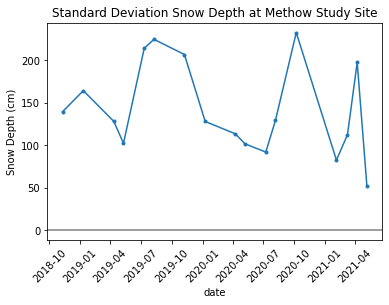

In [113]:
fig, ax = plt.subplots()

atl08_methow_95_5_0['difference_cm'].groupby(atl08_methow_95_5_0.date).std().plot(marker='.') # , linestyle='none'
plt.axhline(y=0, c='grey')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=45)
plt.title('Standard Deviation Snow Depth at Methow Study Site');

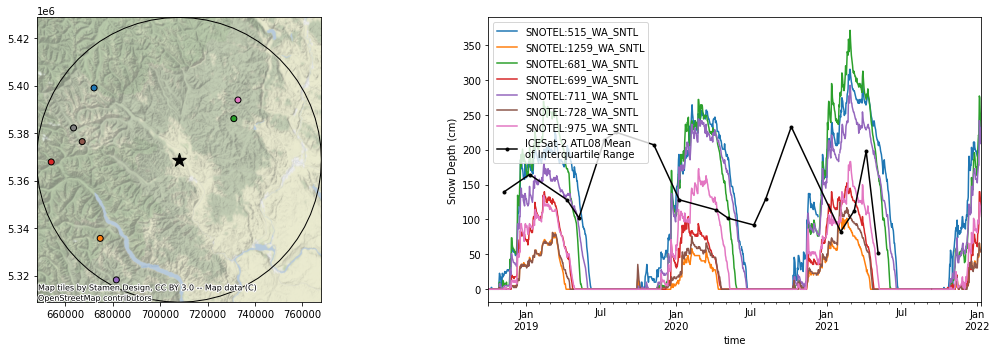

In [97]:
color_list = ['C%i' % i for i in range(len(site_codes))]

f, axa = plt.subplots(1,2,figsize=(15,5))

snotel_60km.plot(facecolor=color_list, edgecolor='k', ax=axa[0])
gdf_center_point.plot(ax=axa[0], facecolor='k', edgecolor='k', marker='*', markersize=200, label='Center of Methow Study Site')
gdf_center2.plot(ax=axa[0], facecolor='none', edgecolor='k', marker='*', label='Center of Methow Study Site')
#lidar_combined_nodata.plot(ax=axa[0])
axa[0].set_xlim(xlim)
axa[0].set_ylim(ylim)
#plt.text(710000,5.37E6, 'Center',fontsize=12)
ctx.add_basemap(ax=axa[0], crs='epsg:32610', source=ctx.providers.Stamen.Terrain, alpha=0.7)
snwd_df_cm.dropna(thresh=2).plot(ax=axa[1])
atl08_methow_95_5_0['difference_cm'].groupby(atl08_methow_95_5_0.index).std().plot(ax=axa[1], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range') #marker='.', linestyle='none', 
plt.ylabel('Snow Depth (cm)')
plt.legend();
plt.tight_layout()

Text(0, 0.5, 'Snow Depth (cm)')

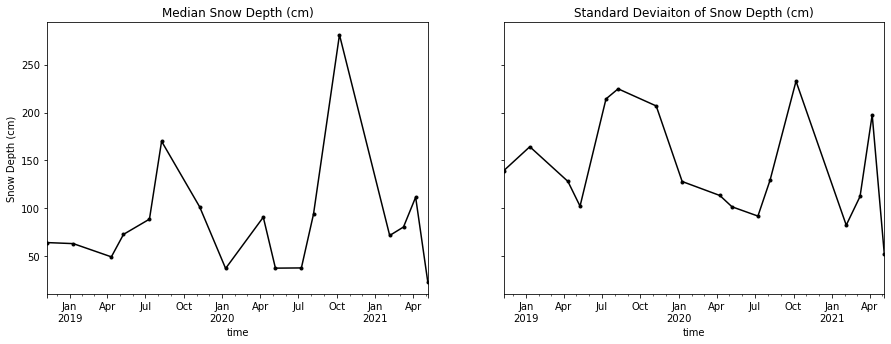

In [116]:
f, axa = plt.subplots(1,2,figsize=(15,5), sharey=True)

atl08_methow_95_5_0['difference_cm'].groupby(atl08_methow_95_5_0.index).std().plot(ax=axa[1], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range')
atl08_methow_95_5_0['difference_cm'].groupby(atl08_methow_95_5_0.index).median().plot(ax=axa[0], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range')
axa[0].set_title('Median Snow Depth (cm)')
axa[1].set_title('Standard Deviaiton of Snow Depth (cm)')
axa[0].set_ylabel('Snow Depth (cm)')

Text(0, 0.5, 'Snow Depth (cm)')

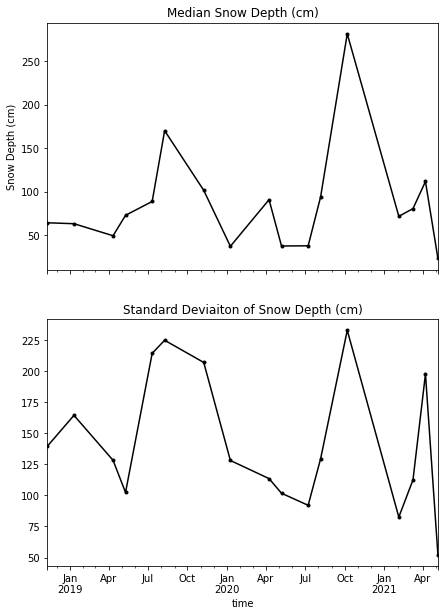

In [121]:
f, axa = plt.subplots(2,1,figsize=(7,10), sharex=True)

atl08_methow_95_5_0['difference_cm'].groupby(atl08_methow_95_5_0.index).std().plot(ax=axa[1], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range')
atl08_methow_95_5_0['difference_cm'].groupby(atl08_methow_95_5_0.index).median().plot(ax=axa[0], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range')
axa[0].set_title('Median Snow Depth (cm)')
axa[1].set_title('Standard Deviaiton of Snow Depth (cm)')
axa[0].set_ylabel('Snow Depth (cm)')

### Try it again on the inner 5-95% of data

In [66]:
clim = np.percentile(atl08_methow['difference'].values,(5,95))
clim

array([-1.4379467,  7.9542764])

In [67]:
atl08_methow_95 = atl08_methow[atl08_methow['difference']<clim[1]]
atl08_methow_95_5 = atl08_methow_95[atl08_methow_95['difference']>clim[0]]
#atl08_methow_95_5['difference_cm'] = atl08_methow_95_5['difference'] * 100

In [48]:
#atl08_methow = atl08_methow[atl08_methow['lidar_z'] > 0]

In [163]:
atl08_methow_95_5['difference_cm'].describe()

count    63900.000000
mean        57.576236
std        178.829882
min       -143.949475
25%        -43.741362
50%         -6.741726
75%         80.361936
max        790.719749
Name: difference_cm, dtype: float64

In [290]:
#atl08_methow = atl08_methow.loc[atl08_methow['difference'] > -1000]

In [68]:
atl08_methow_95_5.index = atl08_methow_95_5.index.to_period('D')
atl08_methow_95_5.index

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

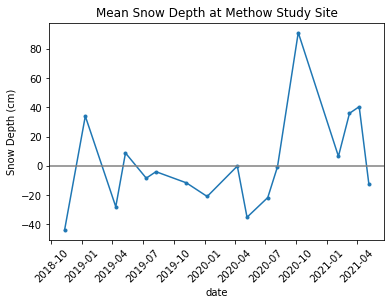

In [69]:
fig, ax = plt.subplots()

atl08_methow_95_5['difference_cm'].groupby(atl08_methow_95_5.date).median().plot(marker='.') # , linestyle='none'
plt.axhline(y=0, c='grey')
plt.ylabel('Snow Depth (cm)')
plt.xticks(rotation=45)
plt.title('Mean Snow Depth at Methow Study Site');

In [165]:
#atl08_methow_95_5['difference_cm'] = 100 * atl08_methow_95_5['difference']

In [166]:
x, y = center.coords.xy

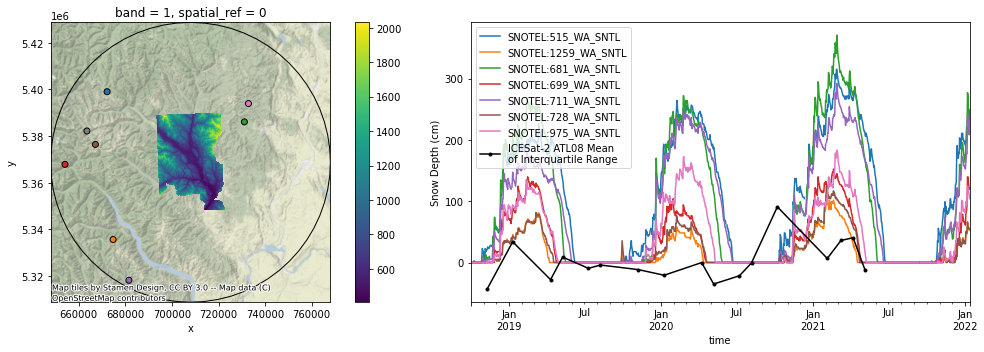

In [170]:
color_list = ['C%i' % i for i in range(len(site_codes))]

f, axa = plt.subplots(1,2,figsize=(15,5))

snotel_60km.plot(facecolor=color_list, edgecolor='k', ax=axa[0])
gdf_center_point.plot(ax=axa[0], facecolor='k', edgecolor='k', marker='*', markersize=200, label='Center of Methow Study Site')
gdf_center2.plot(ax=axa[0], facecolor='none', edgecolor='k', marker='*', label='Center of Methow Study Site')
lidar_combined_nodata.plot(ax=axa[0])
axa[0].set_xlim(xlim)
axa[0].set_ylim(ylim)
#plt.text(710000,5.37E6, 'Center',fontsize=12)
ctx.add_basemap(ax=axa[0], crs='epsg:32610', source=ctx.providers.Stamen.Terrain, alpha=0.7)
snwd_df_cm.dropna(thresh=2).plot(ax=axa[1])
atl08_methow_95_5['difference_cm'].groupby(atl08_methow_95_5.index).median().plot(ax=axa[1], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range') #marker='.', linestyle='none', 
plt.ylabel('Snow Depth (cm)')
plt.legend();
plt.tight_layout()

In [87]:
snotel_60km['elevation_ft'] = snotel_60km['elevation_m'] * 3.28

array([[<AxesSubplot:title={'center':'elevation_ft'}>]], dtype=object)

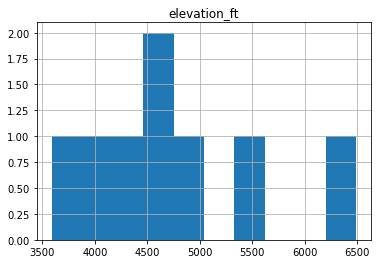

In [66]:
snotel_60km.hist('elevation_ft', bins=10)

## Pull Snotel Data At Different Elevation Bands

#### Elevations in this region span 1345 to 6545 ft. I will separate these into elevation bands:  
* 1345-3000 ft = 914.4 m,  
* 3001 - 4000 = 1219.2 m,  
* 4001-5000 = 1524 m,  
* 5001-6000 = 1828.8 m,  
* 6000-7000 = 2133.6 m

In [88]:
elev_thresholds = [3000, 4000, 5000, 6000] #feet

snotel_60km_2k = snotel_60km[snotel_60km['elevation_ft'] < elev_thresholds[0]]
#print(snotel_60km_2k)

snotel_60km_3k = snotel_60km[(snotel_60km['elevation_ft'] < elev_thresholds[1]) & (snotel_60km['elevation_ft'] > elev_thresholds[0])]
#print(snotel_60km_3k)

snotel_60km_4k = snotel_60km[(snotel_60km['elevation_ft'] < elev_thresholds[2]) & (snotel_60km['elevation_ft'] > elev_thresholds[1])]
#print(snotel_60km_4k)

snotel_60km_5k = snotel_60km[(snotel_60km['elevation_ft'] < elev_thresholds[3]) & (snotel_60km['elevation_ft'] > elev_thresholds[2])]
#print(snotel_60km_5k)

snotel_60km_6k = snotel_60km[(snotel_60km['elevation_ft'] > elev_thresholds[3])]
#print(snotel_60km_6k)

In [68]:
# SNOTEL sites with a 60km radius of the Methow

pkl_fns = ['snotel_snwd_d_2k.pkl', 'snotel_snwd_d_3k.pkl', 'snotel_snwd_d_4k.pkl', 'snotel_snwd_d_5k.pkl', 'snotel_snwd_d_6k.pkl']
gdfs = [snotel_60km_2k, snotel_60km_3k, snotel_60km_4k, snotel_60km_5k, snotel_60km_6k]
dfs = {}

#for x in range(0, len(pkl_fns)):
for pkl_fn, gdf, x in zip(pkl_fns, gdfs, range(0,len(pkl_fns))):
    if os.path.exists(pkl_fn):
        dfs[x] = pd.read_pickle(pkl_fn)
    else:
        #Define an empty dictionary to store returns for each site
        value_dict = {}
        for i, sitecode in enumerate(gdf.index):
            print('%i of %i sites' % (i+1, len(gdf.index)) )
            #out = fetch(sitecode, variablecode, start_date, end_date)
            out = fetch(sitecode, variablecode)
            if out is not None:
                value_dict[sitecode] = out['value']
        #Convert the dictionary to a DataFrame, automatically handles different datetime ranges (nice!)
        dfs[x] = pd.DataFrame.from_dict(value_dict)
        dfs[x] = dfs[x]*2.54
        #Write out
        print(f"Writing out: {pkl_fn}")
        dfs[x].to_pickle(pkl_fn)

In [92]:
#https://datagy.io/pandas-conditional-column/

conditions = [
    (atl08_methow_95_5_0['lidar_z'] < 914.4), # below 3k ft elevation (in this case, between 1345 and 3000 ft)
    (atl08_methow_95_5_0['lidar_z'] >= 914.4) & (atl08_methow_95_5_0['lidar_z'] < 1219.2), # between 3k and 4k ft elevation
    (atl08_methow_95_5_0['lidar_z'] >= 1219.2) & (atl08_methow_95_5_0['lidar_z'] < 1524), # between 4k and 5k ft. elevation
    (atl08_methow_95_5_0['lidar_z'] >= 1524) & (atl08_methow_95_5_0['lidar_z'] < 1828.8), # between 5k and 6k ft elevation
    (atl08_methow_95_5_0['lidar_z'] >= 1828.8) # above 6k ft elevation (highest point is below 7k)
]
values = [2000, 3000, 4000, 5000, 6000]
atl08_methow_95_5_0['elevation_band'] = np.select(conditions, values)

/Users/Hannah/opt/miniconda3/envs/datum_reproj/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [504]:
# f, axa = plt.subplots(1,2,figsize=(15,5))
# snotel_60km.plot(facecolor=color_list, edgecolor='k', ax=axa[0])
# gdf_center_point.plot(ax=axa[0], facecolor='k', edgecolor='k', marker='*', markersize=200, label='Center of Methow Study Site')
# #plt.text(710000,5.37E6, 'Center',fontsize=12)
# ctx.add_basemap(ax=axa[0], crs='epsg:32610', source=ctx.providers.Stamen.Terrain, alpha=0.7)
# snwd_df_cm.dropna(thresh=2).plot(ax=axa[1])
# atl08_methow_95_5['difference_cm'].groupby(atl08_methow_95_5.index).mean().plot(ax=axa[1], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range') #marker='.', linestyle='none', 
# plt.legend()

In [408]:
for color in color_list:
    print(color)

C0
C1
C2
C3


['3000', '4000', '5000', '6000']

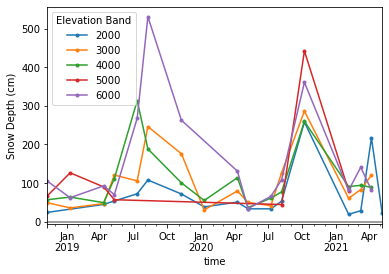

In [93]:
label_list = []
for i in sorted(atl08_methow_95_5_0['elevation_band'].unique()):
    label_list.append(str(i))


fig, ax = plt.subplots()
color_list = ['C%i' % i for i in range(len(atl08_methow_95_5_0['elevation_band'].unique()))]

for color, label, elevation in zip(color_list, label_list, atl08_methow_95_5_0['elevation_band'].unique()):
    atl08_methow_95_5_band = atl08_methow_95_5_0[atl08_methow_95_5_0['elevation_band'] == elevation]
    atl08_methow_95_5_band['difference_cm'].groupby(atl08_methow_95_5_band.index).median().plot(color=color, marker='.', label = label) 
plt.legend(title='Elevation Band')
plt.ylabel('Snow Depth (cm)')
plt.axhline(y=0, c='grey')

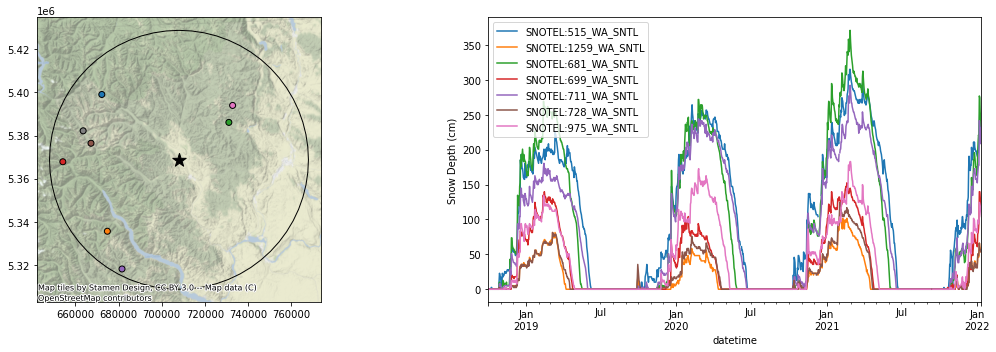

In [75]:
color_list = ['C%i' % i for i in range(len(site_codes))]

f, axa = plt.subplots(1,2,figsize=(15,5))

snotel_60km.plot(facecolor=color_list, edgecolor='k', ax=axa[0])
gdf_center_point.plot(ax=axa[0], facecolor='k', edgecolor='k', marker='*', markersize=200, label='Center of Methow Study Site')
gdf_center2.plot(ax=axa[0], facecolor='none', edgecolor='k', marker='*', label='Center of Methow Study Site')
#plt.text(710000,5.37E6, 'Center',fontsize=12)
ctx.add_basemap(ax=axa[0], crs='epsg:32610', source=ctx.providers.Stamen.Terrain, alpha=0.7)
snwd_df_cm.dropna(thresh=2).plot(ax=axa[1], color=color_list)
#atl08_methow_95_5['difference_cm'].groupby(atl08_methow_95_5.index).median().plot(ax=axa[1], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range') #marker='.', linestyle='none', 
plt.ylabel('Snow Depth (cm)')
plt.legend();
plt.tight_layout()

In [84]:
dfs[1]

,SNOTEL:699_WA_SNTL,SNOTEL:975_WA_SNTL
datetime,,
2018-10-01 00:00:00+00:00,0.00,0.00
2018-10-02 00:00:00+00:00,0.00,0.00
2018-10-03 00:00:00+00:00,0.00,0.00
2018-10-04 00:00:00+00:00,0.00,0.00
2018-10-05 00:00:00+00:00,0.00,0.00
...,...,...
2022-01-08 00:00:00+00:00,139.70,121.92
2022-01-09 00:00:00+00:00,132.08,119.38
2022-01-10 00:00:00+00:00,124.46,114.30


In [101]:
atl08_methow_95_5.head()

,dh_fit_dx,segment_id,h_mean,gt,h_sigma,rgt,delta_time,distance,spot,w_surface_window_final,...,n_fit_photons,dh_fit_dy,cycle,geometry,z,date,lidar_z,difference,difference_cm,elevation_band
time,,,,,,,,,,,,,,,,,,,,,
2018-11-09,-0.018729,268501,890.439475,10,0.140184,646,2.703658e+07,5.384065e+06,2,3.000000,...,20,0.0,1,POINT (721911.337 5360381.569),890.439475,2018-11-09,890.341125,0.098349,9.834907,2000
2018-11-09,-0.237798,268512,875.357903,10,0.038751,646,2.703658e+07,5.384285e+06,2,6.094605,...,11,0.0,1,POINT (721881.770 5360600.028),875.357903,2018-11-09,874.940796,0.417107,41.710722,2000
2018-11-09,-0.292818,268520,839.168297,10,0.117819,646,2.703658e+07,5.384446e+06,2,7.491855,...,18,0.0,1,POINT (721861.048 5360759.013),839.168297,2018-11-09,838.467834,0.700463,70.046294,2000
2018-11-09,-0.314288,268521,832.994495,10,0.134250,646,2.703658e+07,5.384466e+06,2,8.037649,...,20,0.0,1,POINT (721858.453 5360778.886),832.994495,2018-11-09,832.586548,0.407947,40.794736,2000
2018-11-09,-0.307294,268524,817.375870,10,0.047395,646,2.703658e+07,5.384526e+06,2,7.859830,...,11,0.0,1,POINT (721850.563 5360838.489),817.375870,2018-11-09,817.340820,0.035050,3.504999,2000


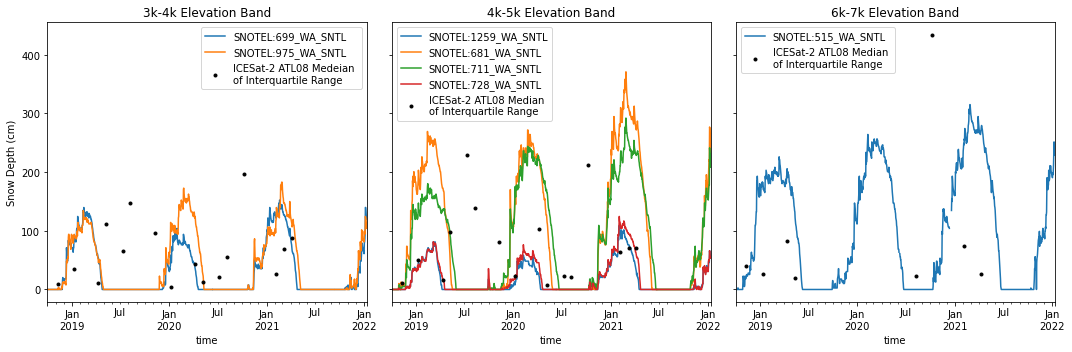

In [123]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

dfs[1].plot(ax=ax[0])
dfs[2].plot(ax=ax[1])
dfs[4].plot(ax=ax[2])

atl08_methow_95_5['difference_cm'].loc[atl08_methow_95_5['elevation_band'] == 
    3000].groupby(atl08_methow_95_5.loc[atl08_methow_95_5['elevation_band'] == 
        3000].index).median().plot(ax=ax[0], 
            color='k', marker='.', linestyle='none', 
                label = 'ICESat-2 ATL08 Medeian \nof Interquartile Range') 

atl08_methow_95_5['difference_cm'].loc[atl08_methow_95_5['elevation_band'] == 
    4000].groupby(atl08_methow_95_5.loc[atl08_methow_95_5['elevation_band'] == 
        4000].index).median().plot(ax=ax[1], 
            color='k', marker='.', linestyle='none',
                label = 'ICESat-2 ATL08 Median \nof Interquartile Range') 

atl08_methow_95_5['difference_cm'].loc[atl08_methow_95_5['elevation_band'] == 
    6000].groupby(atl08_methow_95_5.loc[atl08_methow_95_5['elevation_band'] == 
        6000].index).median().plot(ax=ax[2], 
            color='k', marker='.', linestyle='none',
                label = 'ICESat-2 ATL08 Median \nof Interquartile Range') 

ax[0].set_ylabel('Snow Depth (cm)')

ax[0].legend()
ax[1].legend()
ax[2].legend(loc='best')

ax[0].set_title('3k-4k Elevation Band')
ax[1].set_title('4k-5k Elevation Band')
ax[2].set_title('6k-7k Elevation Band')
plt.tight_layout();
#atl08_methow_95_5['difference_cm'][atl08_methow_95_5['elevation_band'] == 3000].groupby(atl08_methow_95_5.index).median().plot(ax=ax)

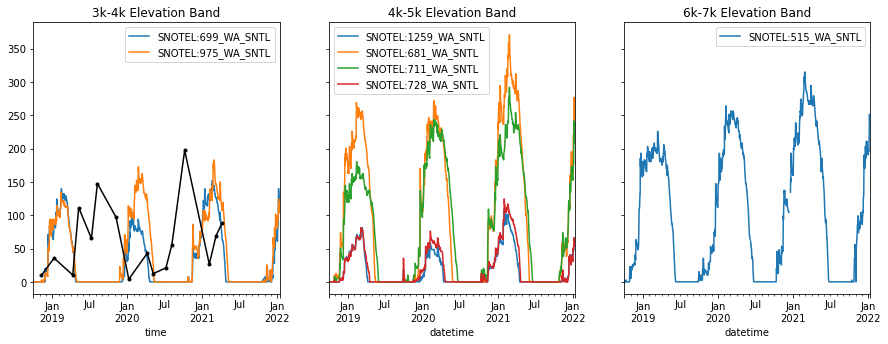

In [108]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

dfs[1].plot(ax=ax[0])
dfs[2].plot(ax=ax[1])
dfs[4].plot(ax=ax[2])

atl08_3k['difference_cm'].groupby(atl08_3k.index).median().plot(ax=ax[0], color='k', marker='.', label = 'ICESat-2 ATL08 Mean \nof Interquartile Range') #marker='.', linestyle='none', 

plt.ylabel('Snow Depth (cm)')

ax[0].set_title('3k-4k Elevation Band')
ax[1].set_title('4k-5k Elevation Band')
ax[2].set_title('6k-7k Elevation Band');
#atl08_methow_95_5['difference_cm'][atl08_methow_95_5['elevation_band'] == 3000].groupby(atl08_methow_95_5.index).median().plot(ax=ax)

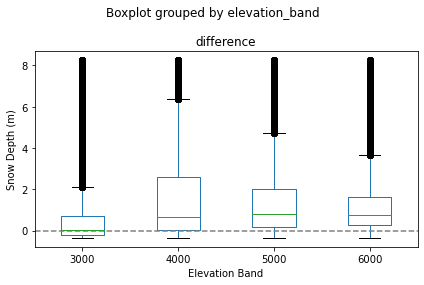

In [402]:
atl08_methow_95_5.boxplot(column=['difference'], by=['elevation_band'], grid=False)
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Elevation Band')
plt.ylabel('Snow Depth (m)')
plt.tight_layout()

Text(0.5, 0, 'Snow Depth (m)')

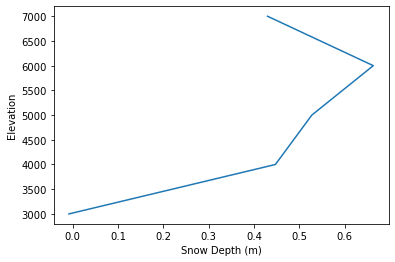

In [43]:
plt.plot( stats['mean_dif'],stats['elevation'])
plt.ylabel('Elevation')
plt.xlabel('Snow Depth (m)')

* Plot the median and interquartile range of each elevation band.
* Pull in all snotel sites within a "reasonable" range: 20-40 km (just want similar weather so that we're plotting similar events (east of the crest, north and south, include the crest but not the western lowlands - crest will be within the higher elevation bands anyways so won't polute the low elevation bands. Avoid the Olympics).  

Meeting on Fri Dec 10, 2021:
* Justin's plot of standard deviation vs mean - they scale together. Can we get a standard deviation from the mean of the icesat-2 data? Since mean scales with standard deviation? Test this in Tuolumne since that where Justin concluded this. How to deal with trees and slope variability. 
* snap-to talk to David: could use domes in Tuolumne as bare ground to snap to (lots of domes to try to get no-snow locations. Or no-snow areas in Methow. 
* Arctic: Matthew is finding the same thing as Justin: standard deviation scales with the mean. Could be helpful in Arctic studies as well. Could check it out for the CARC study area. Can also try in Tulic: throw out the ground and think about the variability of the snow surface instead. Flat areas where we don't expect steep slopes to get in the way of our standard deviation measurements. 
* Could ask Matthew for snow depth data for validation, he'd be happy to share.
* Try to schedule a meeting with David and Jessica to talk about NASA proposal. Potentially during grading next week.
* Talk to Justin about whether he developed a relationship. 2019 paper? or 2020. In the paper about the repeatability of lidar flights. He has plots of stdev vs. mean. Ask Justin to send me his graph and the paper it's in. And any additional figures that didn't make it into the paper. Also, coefficient of variability also scales by about a square relationship. Other papers that might be useful: Martin Clark 2011 (variability of snow cover) - table of cv and also a good lit review, sturm and wagner, glen liston has one for modeling (subgrid scale variability with a table for cv for different environments. Jessica should have these papers (slack her to ask for these references - justin should also have these).
* CV should be somewhat constant - if you know the cv for your environment, then use measured standard deviation to solve for the mean. 
CV = stdev/mean. 
* If I can get anything like this that looks good, one figure will get me the grant and then can spend the phd figuring out how to make it work. 
* Also, don't forget to check out all the ICESat-2 posters and presentations!

* In summary, could go 2 directions (or do both?): snap-to the ground surface in snowfree areas, or/and use standard deviation of the differences to estimate mean snowdepth along-track.

### Meeting Dec 17

* Difference between ground and canopy returns, and how that average difference shrinks...need a very standard forest structure? Difference between hill slopes and valley bottoms? boxplots of canopy height for the whole domain

Text(0.5, 0, 'Standard Deviation of Differences')

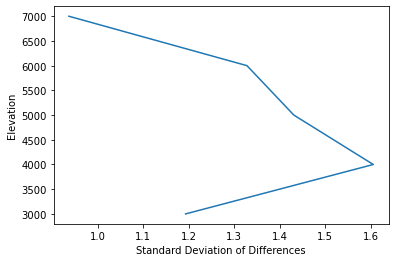

In [45]:
plt.plot( stats['std_dif'],stats['elevation'])
plt.ylabel('Elevation')
plt.xlabel('Standard Deviation of Differences')

More Next steps:

* Separate Methow Valley by elevation band
* Pull in Snotel for Methow region  
* Reprocess Tuolumne dataset with SlideRule lengths.  
* How much snow does the East side get? Lee Vining area.  
